In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [4]:
# three11_data = pd.read_csv("https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4")
#Alternate command
three11_data = pd.read_csv('76fda9d0-69be-4dd5-8108-0de7907fc5a4.csv')
hood_csv = pd.read_csv('https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff')

In [10]:
road_obstructions = three11_data[(three11_data.REQUEST_TYPE == "Street Obstruction/Closure")|(three11_data.REQUEST_TYPE == "Potholes")|(three11_data.REQUEST_TYPE == "Road")]

road_obstructions.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
16,184586.0,2017-09-05T11:50:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Lower Lawrenceville,7.0,6.0,4.200309e+10,2.0,6.0,2.0,3-3,-79.966906,40.471717,EXACT
17,183065.0,2017-08-29T10:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Windgap,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,-80.073213,40.457633,EXACT
21,181351.0,2017-08-22T15:31:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,-79.981714,40.381741,EXACT
25,177411.0,2017-08-08T08:18:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,North Oakland,8.0,5.0,4.200356e+10,3.0,5.0,4.0,2-23,-79.952022,40.451890,EXACT


In [11]:
num_ro = road_obstructions['NEIGHBORHOOD'].value_counts()
num_ro.head()

Brookline                3782
Squirrel Hill South      2762
Bloomfield               2667
Carrick                  2593
Central Lawrenceville    1802
Name: NEIGHBORHOOD, dtype: int64

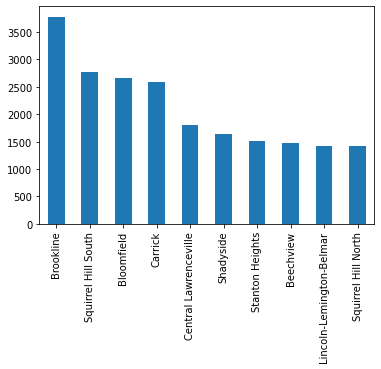

In [64]:
num_ro.head(10).plot.bar()

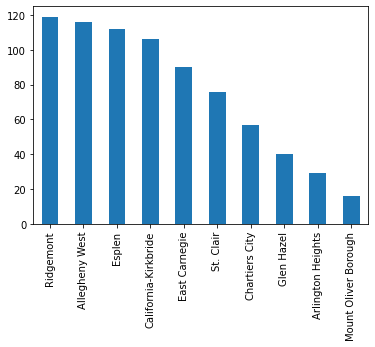

In [25]:
num_ro.tail(10).plot.bar()

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,1.027890e+07,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,5.579501e+06,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,6.050988e+06,15,Stephanie Joy Everett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,1.271304e+07,15,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


In [80]:
len(num_ro.axes[0])

91

In [82]:
pm = pd.DataFrame({'neighborhood': num_ro.axes[0], 'obs': num_ro.values})
pm

,neighborhood,obs
0,Brookline,3782
1,Squirrel Hill South,2762
2,Bloomfield,2667
3,Carrick,2593
4,Central Lawrenceville,1802
...,...,...
86,St. Clair,76
87,Chartiers City,57
88,Glen Hazel,40
89,Arlington Heights,29


Incidents per Square Mile

In [8]:
newhood = hood_csv.filter(["hood", "sqmiles"])
newhood

,hood,sqmiles
0,Chateau,0.383
1,Summer Hill,0.439
2,Northview Heights,0.313
3,Spring Hill-City View,0.630
4,Perry South,0.905
...,...,...
85,Overbrook,0.839
86,Chartiers City,0.132
87,Esplen,0.230
88,Ridgemont,0.369


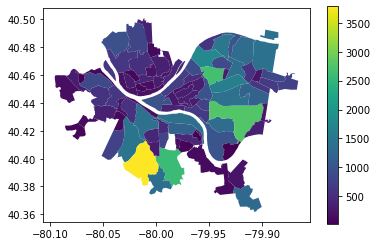

In [85]:
ro_map = neighborhoods.merge(pm, how='left', left_on='hood', right_on='neighborhood')
ro_map.plot(column='obs',legend=True)